In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

In [2]:
def random_xy(num_points=100):
    return pd.DataFrame({
        'x': np.random.rand(num_points),
        'y': np.random.rand(num_points)
    })

def x_plus_noise(num_points=100, slope=1, randomness=0.1):
    if not (0 <= randomness <= 1):
        raise ValueError('randomness must be between 0 and 1 (inclusive).')
    x = np.random.rand(num_points)
    return pd.DataFrame({
        'x': x,
        'y': slope * x + np.random.normal(scale=randomness, size=num_points)
    })

def data_3d(num_points=100, randomness=0.1):
    data = pd.DataFrame({
        'x': np.random.normal(scale=10, size=num_points),
        'y': np.random.normal(scale=1, size=num_points),
        'z': np.random.normal(scale=randomness, size=num_points)
    })
    return pd.DataFrame(
        (np.dot(rot_mat_x(), np.dot(rot_mat_z(), data.values.transpose()))).transpose(),
        columns=['x', 'y', 'z']
    )

def rot_mat_x(theta=np.radians(30)):
    return np.array([
        [1, 0, 0],
        [0, np.cos(theta), -np.sin(theta)],
        [0, np.sin(theta), np.cos(theta)]
    ])

def rot_mat_z(theta=np.radians(60)):
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])

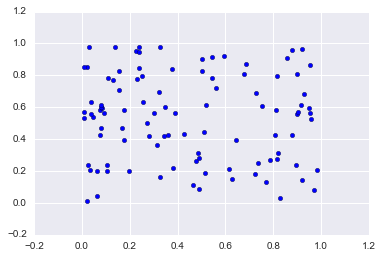

In [3]:
# Totally random data
data = random_xy()
plt.scatter(data['x'], data['y'])

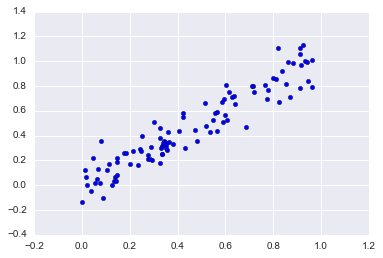

In [4]:
# Correlated data
data = x_plus_noise()
plt.scatter(data['x'], data['y'])

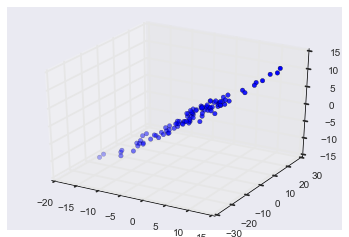

In [5]:
# 3D data
data = data_3d()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['x'], data['y'], data['z'])

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA()

In [8]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
# The variance corresponding to each PC
pca.explained_variance_

array([  1.09229747e+02,   8.84589222e-01,   7.70540249e-03])

(-25, 25)

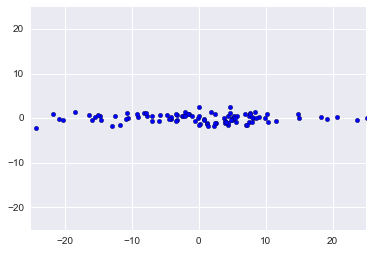

In [10]:
# The most informative (more spread/more variance) view of the data
data_flat = pca.transform(data)
plt.scatter(data_flat[:,0], data_flat[:,1])
plt.xlim([-25,25])
plt.ylim([-25,25])

(-25, 25)

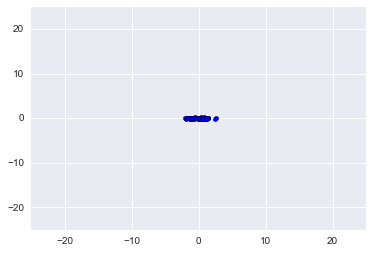

In [11]:
# A less informative (less spread) representation
data_flat = pca.transform(data)
plt.scatter(data_flat[:,1], data_flat[:,2])
plt.xlim([-25,25])
plt.ylim([-25,25])

(-25, 25)

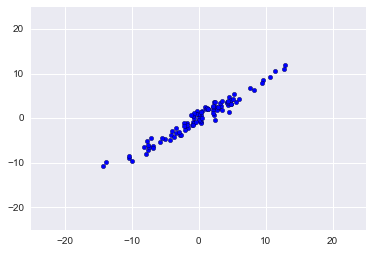

In [12]:
# Compare with the original features
data_flat = pca.transform(data)
plt.scatter(data['x'], data['z'])
plt.xlim([-25,25])
plt.ylim([-25,25])

In [13]:
# The components in terms of the original features/axis
pca.components_

array([[ 0.49986437,  0.74981053,  0.43349715],
       [ 0.86607693, -0.43666827, -0.24337538],
       [-0.00680903, -0.49709657,  0.86766851]])

In [14]:
# This is our original rotation matrix!
np.dot(rot_mat_x(), rot_mat_z()).transpose()

array([[ 0.5      ,  0.75     ,  0.4330127],
       [-0.8660254,  0.4330127,  0.25     ],
       [ 0.       , -0.5      ,  0.8660254]])